#**TUGAS PRAKTIKUM 11 MACHINE LEARNING (DBSCAN)**


Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi

#**PENJELASAN DATASET**

Dataset earthquake_1995–2023 merupakan kumpulan data historis kejadian gempa bumi yang terjadi di seluruh dunia selama rentang waktu 28 tahun (1995–2023). Dataset ini memuat ribuan catatan gempa dari berbagai wilayah yang terdampak, mulai dari zona subduksi aktif seperti Indonesia, Jepang, Alaska, Chile, hingga wilayah dengan aktivitas seismik rendah.

#**1. Instalasi Library**

In [ ]:
!pip install folium
!pip install contextily
!pip install geopandas

#**2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import shapiro

import folium
from folium.plugins import HeatMap

#**3. Load Dataset**

#Menghubungkan drive dengan colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Membaca dataset

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum11/data/earthquake_1995-2023.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


Dari dataset di atas terdiri dari 1000 baris dan 19 kolom.

#Membaca informasi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

Terdapat 3 type data dari dataset di atas yaitu float(6), int(5), dan objedt(8).

#**4. Data Preparation**

#Mengecek missing value

In [ ]:
df.isnull().sum()

,0
title,0
magnitude,0
date_time,0
cdi,0
mmi,0
alert,551
tsunami,0
sig,0
net,0
nst,0


Terdapat nilai kosong pada 3 kolom dari 19, yaitu kolom alert, location dan country

#Menghapus nilai kosong/misisng value

In [ ]:
df = df.dropna()
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.6340,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
17,M 6.5 - near the east coast of the Kamchatka P...,6.5,03-04-2023 03:06,7,6,yellow,1,655,us,104,0.2660,30.0,mww,105.631,52.7772,158.4840,"the Kamchatka Peninsula, Russia",Asia,Russian Federation (the)
18,"M 7.0 - New Guinea, Papua New Guinea",7.0,02-04-2023 18:04,7,7,green,1,781,us,105,6.4500,31.0,mww,62.603,-4.2924,143.1550,"New Guinea, Papua New Guinea",Asia,Papua New Guinea
19,M 6.5 - 84 km NNW of San Antonio de los Cobres...,6.5,22-03-2023 16:00,4,4,green,0,656,us,97,1.6220,33.0,mww,209.976,-23.4797,-66.5108,"San Antonio de los Cobres, Argentina",South America,Argentina
20,"M 6.5 - 40 km SSE of Jurm, Afghanistan",6.5,21-03-2023 16:47,7,5,green,0,1350,us,134,2.5300,13.0,mww,187.589,36.5227,70.9787,"Jurm, Afghanistan",Asia,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"M 6.6 - 183 km SW of Belaya Gora, Russia",6.6,14-02-2013 13:13,0,7,green,1,670,us,697,0.0000,15.3,mww,11.000,67.6310,142.5080,"Belaya Gora, Russia",Asia,Russia
443,"M 6.9 - 2 km NNE of Yacuanquer, Colombia",6.9,09-02-2013 14:16,5,5,green,1,904,us,562,0.0000,23.7,mww,145.000,1.1350,-77.3930,"Yacuanquer, Colombia",South America,Colombia
450,"M 6.9 - 18 km SSW of Obihiro, Japan",6.9,02-02-2013 14:17,6,7,yellow,0,814,us,686,0.0000,28.0,mww,107.000,42.7700,143.0920,"Obihiro, Japan",Asia,Japan
451,"M 6.8 - 54 km N of Vallenar, Chile",6.8,30-01-2013 20:15,6,7,green,0,771,us,596,0.0000,19.3,mww,45.000,-28.0940,-70.6530,"Vallenar, Chile",South America,Chile


#Mengecek duplikat data

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat.

#**5. Exploratory Data Analysis (EDA)**

#Distribusi Magnitudo & Kedalaman Gempa

#Magnitudo

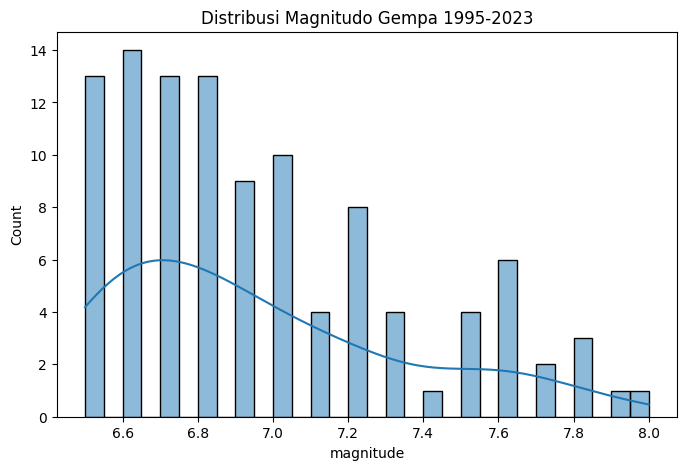

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title("Distribusi Magnitudo Gempa 1995-2023")
plt.show()

Visualisasi histogram magnitudo di atas menunjukkan bahwa gempa bumi dengan intensitas menengah, khususnya pada rentang 6.5–6.8 Mw, merupakan yang paling sering terjadi selama periode 1995–2023. Frekuensi gempa menurun seiring meningkatnya magnitudo, sehingga gempa besar di atas 7.5 Mw tergolong jarang. Distribusi magnitudo tampak condong ke kanan (right-skewed), menandakan adanya lebih banyak kejadian gempa dengan magnitudo rendah dibandingkan magnitudo tinggi.

#Depth (Kedalaman)

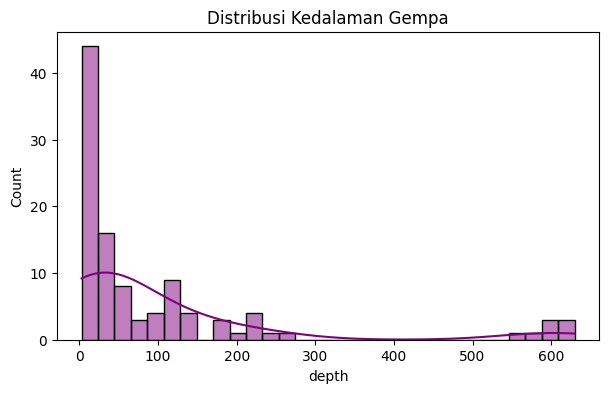

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['depth'], bins=30, kde=True, color='purple')
plt.title("Distribusi Kedalaman Gempa")
plt.show()


Grafik menunjukkan bahwa mayoritas gempa terjadi pada kedalaman dangkal, yaitu di bawah 50 km. Frekuensinya jauh lebih tinggi dibanding kedalaman menengah hingga dalam. Semakin besar kedalaman (100–600 km), jumlah kejadian semakin sedikit, sehingga gempa dalam relatif jarang. Kurva KDE menurun tajam setelah puncak awal, menegaskan dominasi gempa dangkal dalam dataset.

#Heatmap persebaran titik gempa (folium)

Kode dibawah ini membuat peta interaktif menggunakan folium.Map dengan titik pusat berdasarkan rata-rata latitude dan longitude dari dataset. Setelah itu, data yang berisi koordinat gempa dan magnitudo diambil dan diubah ke dalam format list agar bisa digunakan oleh HeatMap. Fungsi HeatMap kemudian menambahkan lapisan peta panas (heatmap) ke peta utama, sehingga setiap titik gempa divisualisasikan sesuai intensitas dan lokasinya.

In [ ]:
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=3)

heat_data = df[['latitude','longitude','magnitude']].dropna().values.tolist()

HeatMap(heat_data, radius=6).add_to(m)

m


Peta interaktif di atas menampilkan pola persebaran kejadian gempa dalam bentuk heatmap. Warna yang tampak pada peta menggambarkan kepadatan dan intensitas aktivitas seismik, di mana area dengan warna lebih tebal menunjukkan adanya konsentrasi gempa yang lebih tinggi. Berdasarkan hasil visualisasi, terlihat bahwa wilayah di sekitar Turki, Iran, Irak, hingga sebagian Timur Tengah menunjukkan akumulasi kejadian gempa yang cukup signifikan. Peta ini membantu memberikan gambaran spasial mengenai area-area yang sering mengalami gempa, sehingga memudahkan analisis pola geografis dan mengidentifikasi zona rawan gempa berdasarkan data historis dalam dataset.

#Peta sebaran magnitudo Gempa

Kode dibawah ini yaitu membuat peta interaktif menggunakan folium.Map dengan titik pusat di koordinat (0, 120) agar fokus pada wilayah Asia–Pasifik, termasuk Indonesia. Selanjutnya, dilakukan iterasi pada setiap baris data menggunakan df.iterrows(). Pada tiap iterasi, folium.CircleMarker digunakan untuk menambahkan penanda berbentuk lingkaran pada posisi latitude dan longitude dari setiap gempa. Ukuran lingkaran disesuaikan dengan nilai magnitudonya, sehingga gempa yang lebih besar terlihat dengan radius yang lebih besar. Setiap marker juga diberi popup berisi informasi magnitudo, yang akan muncul ketika titik diklik.

In [ ]:
m2 = folium.Map(location=[0,120], zoom_start=3)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['magnitude'],
        popup=f"Magnitude: {row['magnitude']}",
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(m2)

m2

Peta interaktif di atas menampilkan sebaran titik-titik gempa dalam bentuk lingkaran berwarna merah. Masing-masing titik menandai lokasi kejadian gempa, dan ukuran lingkarannya mencerminkan besarnya magnitudo, sehingga semakin besar magnitudo semakin besar pula radius penanda. Dari visualisasi terlihat bahwa aktivitas gempa tersebar di berbagai wilayah, termasuk Indonesia, Jepang, Filipina, India, hingga Asia Tengah. Peta ini memberikan gambaran yang jelas mengenai lokasi geografis dan variasi kekuatan gempa di berbagai kawasan, sekaligus memudahkan analisis pola sebaran gempa berdasarkan intensitasnya.

#Grafik Bar wilayah paling sering gempa TOP 10

Kode di bawah ini dimulai dengan menghitung frekuensi kemunculan setiap lokasi gempa menggunakan df['location'].value_counts(), kemudian mengambil 10 lokasi teratas yang paling sering muncul dengan head(10). Selanjutnya dibuat figure berukuran 10×6, lalu sns.barplot digunakan untuk memvisualisasikan jumlah kejadian gempa pada masing-masing lokasi. Nilai frekuensi ditempatkan pada sumbu X, sedangkan nama lokasi berada pada sumbu Y. Palet warna “Reds_r” digunakan untuk memberikan gradasi warna merah dari muda ke tua sesuai tinggi rendahnya frekuensi. Judul grafik serta label sumbu ditambahkan untuk memperjelas informasi yang ditampilkan.

/tmp/ipython-input-1523686360.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")


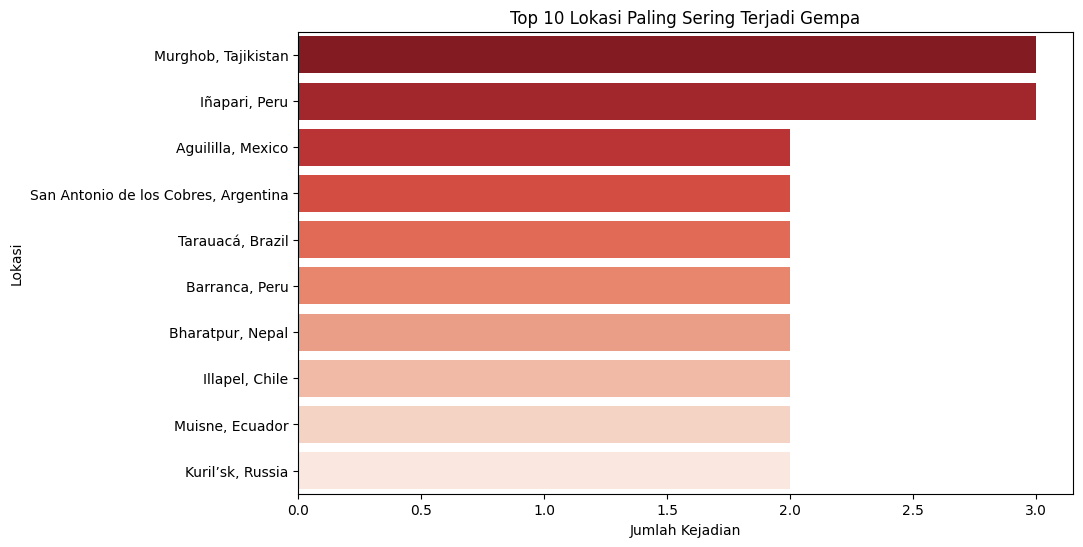

In [ ]:
top10 = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 Lokasi Paling Sering Terjadi Gempa")
plt.xlabel("Jumlah Kejadian")
plt.ylabel("Lokasi")
plt.show()

Grafik batang horizontal di atas menampilkan sepuluh lokasi dengan jumlah kejadian gempa terbanyak dalam dataset. Setiap batang menunjukkan banyaknya gempa yang terjadi di lokasi tersebut, dengan warna yang semakin gelap menandakan frekuensi yang lebih tinggi. Dari visualisasi terlihat bahwa wilayah seperti Murghob (Tajikistan) dan Ilápairi (Peru) termasuk lokasi yang paling sering mengalami gempa, diikuti oleh beberapa daerah lain seperti Aguillila, San Antonio de los Cobres, dan Tarauaca.

#Korelasi (Heatmap)

Kode ini mengambil empat variabel numerik—magnitude, depth, latitude, dan longitude, lalu menyimpannya dalam num_df. Selanjutnya, korelasi antar variabel dihitung menggunakan metode Spearman melalui num_df.corr(method='spearman'), yang cocok digunakan untuk data yang tidak berdistribusi normal. Hasil korelasi kemudian divisualisasikan menggunakan sns.heatmap, dengan annot=True untuk menampilkan nilai korelasi pada setiap sel dan palet warna “coolwarm” untuk memperjelas perbedaan nilai korelasi.

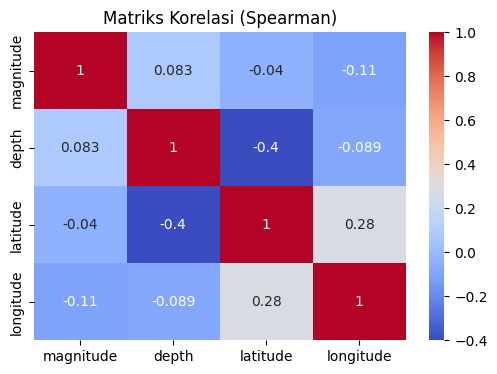

In [ ]:
num_df = df[['magnitude','depth','latitude','longitude']]
corr = num_df.corr(method='spearman')

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi (Spearman)")
plt.show()


Korelasi/heatmap di atas menampilkan hubungan korelasi antar empat variabel utama dalam dataset. Setiap sel pada grafik menunjukkan nilai korelasi Spearman, yang direpresentasikan dalam skala warna dari biru (negatif) hingga merah (positif). Dari visualisasi terlihat bahwa sebagian besar hubungan antar variabel memiliki korelasi yang lemah. Kedalaman dan latitude menunjukkan korelasi negatif yang cukup jelas, mengindikasikan bahwa gempa cenderung terjadi pada kedalaman yang berbeda di wilayah lintang tertentu. Sementara itu, hubungan antara magnitude dengan variabel lain tampak sangat lemah, yang berarti besar magnitudo tidak memiliki keterkaitan kuat dengan kedalaman atau lokasi geografis.

#**6. Uji Normalitas**

In [ ]:
for col in ['magnitude','depth','latitude','longitude']:
    stat, p = shapiro(df[col].dropna()[:5000])  # Shapiro max 5000 sample
    print(f"{col} → p-value = {p}")

magnitude → p-value = 1.2790848315492406e-06
depth → p-value = 1.5641054926223913e-15
latitude → p-value = 0.00017614675641420278
longitude → p-value = 9.474676797412653e-07


Semua variabel (magnitude, depth, latitude, dan longitude) memiliki p-value yang sangat kecil, jauh di bawah batas signifikansi umum (0.05). Hal ini menunjukkan bahwa seluruh variabel tidak berdistribusi normal. Kondisi ini menegaskan bahwa data memiliki pola sebaran yang tidak simetris atau mengandung outlier, sehingga metode analisis non-parametrik seperti korelasi Spearman dan teknik scaling yang lebih robust menjadi pilihan yang tepat untuk tahapan analisis selanjutnya.

#**7. Normalisasi (RobustScaler)**

In [ ]:
features = df[['latitude','longitude','depth','magnitude']]

scaler = RobustScaler()
scaled = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled, columns=features.columns)
scaled_df

,latitude,longitude,depth,magnitude
0,-1.373912,-0.559920,1.435904,-0.434783
1,0.633388,0.754655,0.759381,-0.608696
2,-0.625906,0.666604,0.316584,0.260870
3,-1.049291,-0.537735,1.833185,-0.608696
4,0.274718,0.252017,1.602802,-0.608696
...,...,...,...,...
101,0.961151,0.662887,-0.214457,-0.434783
102,-0.506145,-0.600243,1.164523,0.086957
103,0.412570,0.666242,0.773469,0.086957
104,-1.151110,-0.561528,0.135433,-0.086957


DataFrame baru bernama scaled_df yang berisi nilai fitur yang sudah dinormalisasi. Nilai pada setiap kolom kini berada pada skala yang lebih seragam, umumnya berada pada rentang sekitar –3 hingga 3. Normalisasi ini membuat semua variabel memiliki kontribusi yang seimbang dalam proses clustering, sehingga tidak ada fitur yang mendominasi hanya karena perbedaan skala satuan, seperti perbedaan besar antara kedalaman (ratusan kilometer) dan magnitudo (skala 1–10). Data yang sudah distandarkan ini menjadi input utama untuk tahap penentuan jarak tetangga terdekat dan penerapan algoritma DBSCAN pada langkah berikutnya.

#**8. Menentukan eps dengan K-Distance Graph**



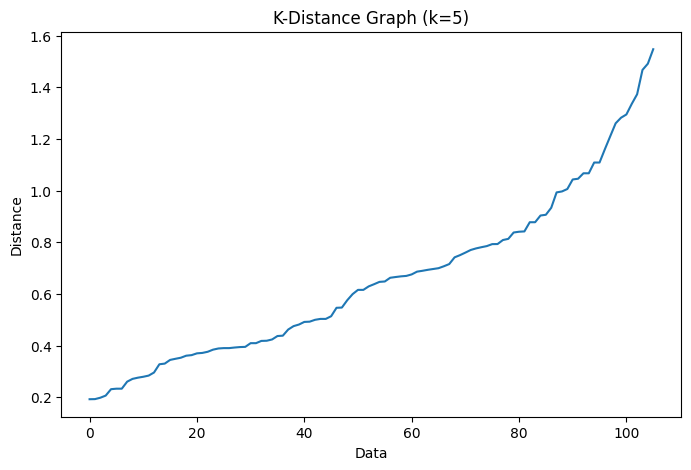

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances[:,4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("K-Distance Graph (k=5)")
plt.xlabel("Data")
plt.ylabel("Distance")
plt.show()

Grafik K-Distance yang menampilkan jarak titik ke tetangga ke-5 dalam urutan menaik. Grafik memperlihatkan pola yang awalnya cenderung landai, kemudian secara bertahap meningkat hingga mencapai kenaikan tajam pada bagian akhir. Titik perubahan atau elbow pada kurva inilah yang menjadi indikasi estimasi nilai eps yang ideal untuk algoritma DBSCAN. Pada plot yang ditampilkan, kenaikan tajam terlihat mulai sekitar nilai jarak 0.8 hingga 1.0, sehingga nilai eps yang berada pada kisaran tersebut dapat dipertimbangkan sebagai parameter yang tepat. Grafik ini membantu memastikan bahwa DBSCAN dapat memisahkan cluster dan mendeteksi noise secara lebih optimal.

#**9. Clustering DBSCAN**

In [ ]:
db = DBSCAN(eps=0.45, min_samples=5)
labels = db.fit_predict(scaled_df)

df['cluster'] = labels
df['cluster'].value_counts()

/tmp/ipython-input-1614338646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


,count
cluster,
-1,56
0,34
1,10
2,6



Hasil menunjukkan adanya empat kelompok, yaitu cluster 0, 1, dan 2, serta satu kategori khusus –1 yang merepresentasikan data noise atau titik yang tidak masuk ke cluster mana pun. Cluster 0 memiliki jumlah anggota paling banyak yaitu 34 titik, diikuti cluster 1 dengan 10 titik, dan cluster 2 dengan 6 titik. Sementara itu, terdapat 56 titik yang diklasifikasikan sebagai noise. Distribusi ini mencerminkan bahwa sebagian besar data membentuk pola kepadatan tertentu, namun masih terdapat cukup banyak titik yang tersebar secara acak sehingga dianggap tidak memenuhi kriteria untuk membentuk cluster.

#**10. Evaluasi Cluster (Silhouette Score)**

In [ ]:
mask = labels != -1
if np.sum(mask) > 1: # Ensure there are at least 2 samples in clusters
    sil = silhouette_score(scaled_df[mask], labels[mask])
    print(f"Silhouette Score: {sil}")
else:
    print("Not enough samples in clusters to compute Silhouette Score.")

Silhouette Score: 0.5175009137719829


Nilai Silhouette Score sebesar 0.5175, yang menunjukkan kualitas cluster yang terbentuk cukup baik. Nilai ini berada di atas 0.5, menandakan bahwa sebagian besar titik berada cukup dekat dengan cluster tempatnya berada dan cukup jauh dari cluster lain. Dengan kata lain, pemisahan antar cluster cukup jelas dan struktur cluster yang terbentuk sudah mencerminkan pola kepadatan yang cukup kuat dalam data. Evaluasi ini mengonfirmasi bahwa parameter eps dan min_samples yang digunakan pada DBSCAN menghasilkan pengelompokan yang efektif untuk dataset gempa.

#**11. Visualisasi Cluster (PCA)**

/tmp/ipython-input-2110387927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC1'] = pca_result[:,0]
/tmp/ipython-input-2110387927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC2'] = pca_result[:,1]


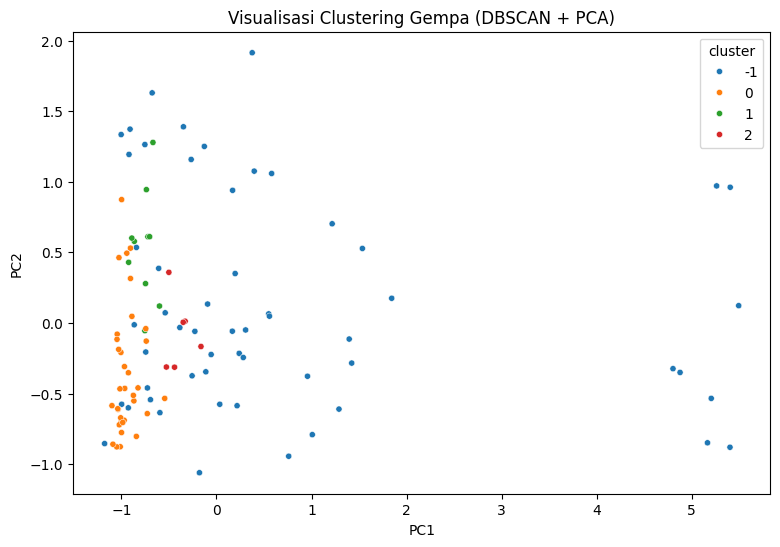

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

df['PC1'] = pca_result[:,0]
df['PC2'] = pca_result[:,1]

plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=20)
plt.title("Visualisasi Clustering Gempa (DBSCAN + PCA)")
plt.show()

Scatter plot dua dimensi di atas menampilkan distribusi cluster hasil DBSCAN setelah direduksi menggunakan PCA. Setiap titik pada grafik merepresentasikan satu kejadian gempa, dengan warna yang berbeda menunjukkan keanggotaan cluster tertentu. Titik berlabel –1 (noise) tampak tersebar luas dan tidak membentuk pola yang jelas, sedangkan titik pada cluster 0, 1, dan 2 terlihat mengelompok pada area tertentu meskipun ukurannya kecil. Plot ini membantu memvisualisasikan bagaimana DBSCAN mengelompokkan data berdasarkan kesamaan kedalaman, lokasi, dan magnitudo, sekaligus menunjukkan seberapa baik pemisahan cluster terjadi dalam ruang berdimensi rendah

#**12. Peta Interaktif Cluster**

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="cluster",
    size="magnitude",
    hover_data=["magnitude","depth","location"],
    mapbox_style="open-street-map",
    zoom=2,
    height=600,
    title="Peta Interaktif Clustering Gempa"
)
fig.show()

Peta interaktif di atas menampilkan persebaran gempa di seluruh dunia dengan warna titik yang merepresentasikan hasil cluster DBSCAN. Setiap cluster memiliki warna berbeda, sehingga pola kelompok gempa terlihat jelas pada wilayah yang memiliki karakteristik serupa. Ukuran titik menunjukkan besar magnitudo, dengan gempa yang lebih kuat tampak lebih besar. Selain itu, ketika titik diarahkan dengan kursor, muncul informasi detail seperti magnitudo, kedalaman, dan nama lokasi. Melalui visualisasi ini, dapat diamati area-area yang memiliki pola aktivitas seismik tertentu, seperti Asia Timur, Asia Selatan, Timur Tengah, hingga kawasan Amerika Tengah dan Selatan.

#**13. Analisis Cluster**

In [ ]:
df.groupby('cluster')[['magnitude','depth']].mean()

,magnitude,depth
cluster,,
-1,7.032143,172.092625
0,6.808824,18.326118
1,7.160000,19.088000
2,6.750000,40.735000


Tabel di atas menampilkan nilai rata-rata magnitudo dan kedalaman untuk setiap cluster. Cluster noise (label –1) memiliki rata-rata kedalaman paling besar, sekitar 172 km, dengan magnitudo 7.03, menunjukkan bahwa titik-titik yang dianggap tidak membentuk pola cenderung merupakan gempa dalam. Cluster 0 memiliki kedalaman paling dangkal, sekitar 18 km, dengan magnitudo sekitar 6.80, sedangkan cluster 1 menunjukkan magnitudo rata-rata tertinggi, yaitu 7.16, pada kedalaman yang juga dangkal. Cluster 2 memiliki magnitudo rata-rata 6.75 dengan kedalaman sekitar 40 km.

#**KESIMPULAN**

Berdasarkan keseluruhan hasil analisis, dapat disimpulkan bahwa sebagian besar gempa dalam dataset 1995–2023 didominasi oleh gempa bermagnitudo menengah dan terjadi pada kedalaman dangkal, sementara gempa besar dan gempa sangat dalam relatif jarang. Pola persebarannya terlihat terkonsentrasi pada kawasan-kawasan aktif tektonik seperti Asia Timur, Asia Selatan, Asia Tenggara, Timur Tengah, dan Amerika bagian tengah hingga selatan. Setelah dilakukan normalisasi dan proses clustering menggunakan DBSCAN, terbentuk tiga cluster utama dengan kualitas pemisahan yang cukup baik, ditunjukkan oleh nilai silhouette score di atas 0.5. Setiap cluster memiliki ciri berbeda, baik dari segi magnitudo maupun kedalaman, sedangkan titik yang masuk kategori noise cenderung merupakan gempa yang lebih dalam dan tidak mengikuti pola kepadatan tertentu. Secara keseluruhan, analisis ini membantu memberikan gambaran yang lebih jelas mengenai karakteristik dan pola seismik global dalam hampir tiga dekade terakhir.